# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
from scipy import stats
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')


1) The sample distribution was plotted to see if it is normal, which it appears to be

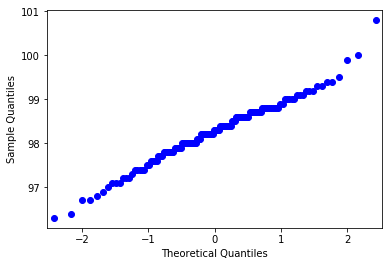

In [10]:
import statsmodels.api as sm
import pylab
# plot the sample data using a qq plot
sm.qqplot(df['temperature'])
pylab.show()

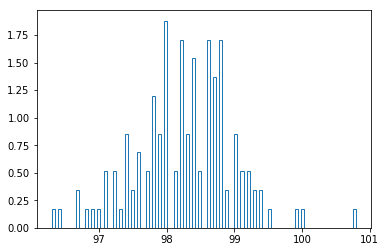

In [3]:

import matplotlib.pyplot as plt
# plot the temperature column containing the sample distribution
_ = plt.hist(df['temperature'], bins = 100, normed=True, histtype = 'step')
plt.show()


2) The sample size is large, as the CLT requires a sample size of 30 or larger. The observations are independent, under the assumption that they each represent different people. 

3) A two-sided test would be most appropriate to determine whether or not 98.6 is the true mean as independent observations can be observed above or below the mean value of the true population mean of 98.6. A z-test is appropriate in this instance, as the sample size is greater than 30. 

z-test assumes that we know the population standard deviation

Run two-sided z-test

In [14]:
# compute mean of sample population
mu = np.mean(df['temperature'])
# compute standard deviation of sample population 
std = np.std(df['temperature'])
# calculate standard error of sample population
SE = std / np.sqrt(len(df['temperature']))
# calculate Z- score using sample population and
# population mean
Z = (98.6 - mu) / SE
# calculate the p-value from the z value
p = stats.norm.cdf(Z)
print ("p-value =", p)

p-value = 0.999999978238


Run two-sided t-test

In [54]:

# use temperature column as input for t-test
temperature = (df['temperature'])

#This is a two-sided t test for the null hypothesis that the 
#expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

t = stats.ttest_1samp(temperature, 98.6)
t

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

Using a t-test on the sample of 130 produces a very low p-value. A t-test assumes a smaller sample size, and therefore the chance for more variance in the sample distribution. 


The null hypothesis assumes that there is no difference between the sample mean and the assumed true mean of 98.6, in which case
98.6 could be the true mean.
The alternative hypothesis assumes that there is a difference between the sample mean and the assumed true mean of 98.6, 
in which case 98.6 can not be the true mean of the population
a two sample z test failed to reject the null hypothesis, with a p-value of .68, meaning that it may be safe to accept the 98.6
value as the true body temperature mean for now

Null Hypothesis: there is no difference between the sample mean and the assumed true mean of 98.6

Alternative Hypothesis: there is a difference between the sample mean and the assumed true mean of 98.6

A two-sided z test failed to reject the null hypothesis, with a p-value of .99, meaning that it may be safe to accept the 98.6 value as the true body temperature mean for now

4) Draw a small sample of size 10 from the data and repeat both tests
 

In [12]:
# draw a random sample of 10 from temperature column
temperature_small = df['temperature'].sample(10)
# calculate sample mean
small_mu = np.mean(temperature_small)
# calculate sample standard deviation
small_std = np.std(temperature_small)

In [13]:
# calculate standard error of sample population
SE = small_std / np.sqrt(len(temperature_small))
# calculate Z- score using sample population and
# population mean
Z = (98.6 - small_mu) / SE
# calculate the p-value from the z value
p = stats.norm.cdf(Z)
print ("p-value =", p)

p-value = 0.99808208589


Two sided t-test with smaller sample

In [57]:

#This is a two-sided test for the null hypothesis that the 
#expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.
t = stats.ttest_1samp(temperature_small, 98.6)
t

Ttest_1sampResult(statistic=-2.0114351989644752, pvalue=0.07515380693453684)

5) At what temperature should we consider someone's temperature to be "abnormal"?

In [22]:
# calculate confidence interval 
conf_int = stats.norm.interval(0.95, loc=mu, scale=std)
conf_int

(96.81775582674824, 99.680705711713316)

As indicated by the confidence interval, 95% of the time we would consider somebody's temperature abnormal below 96.8 and above 99.7 as abnormal

6) Is there a significant difference between males and females in normal temperature?

In [8]:
# define function to simulate two-sampled z-test of different means
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    from numpy import sqrt, abs, round
    from scipy import stats
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - stats.norm.cdf(abs(z)))
    return z, pval

Extract statistics from data to input into two-sample z difference of means

In [6]:
mu_male = round(np.mean(df[df['gender'] == "M"].temperature), 2)
mu_female = round(np.mean(df[df['gender'] == "F"].temperature), 2)
std_male = round(np.std(df[df['gender'] == "M"].temperature), 2)
std_female = round(np.std(df[df['gender'] == "F"].temperature), 2)
male = df[df['gender'] == "M"].temperature.count()
female = df[df['gender'] == "F"].temperature.count()


Run two-sample z difference of means

In [10]:
# sample mean 1
X1 = mu_male
# sample mean 2
X2 = mu_female
# mu difference of the true male and female population is not available in this case
mudiff = 0
# sample std 1
sd1 = std_male
# sample std 2
sd2 = std_female
# sample population size 1 
n1 = male
# sample population size 2
n2 = female
# run function 
z, p = twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2)
print ("p-value:", p)

p-value: 0.0208421504581


A two-sample z test difference of means is the most appropriate test for this problem. Both male and female populations from the sample mean are greater than 30. In addition, we want to test for a significant difference between the true male and female population temperatures. If the population is truly normal, a two-sample z test for difference of means that the null hypothesis - that there is no difference between the means of the two populations - should be rejected. The alternative hypothesis - that there is a significant difference between the population means - can be accepted under a .05 alpha levelj, as the p-value given for the test is .02.  


no standard deviation? does this apply when deciding t test over z test?
